In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
from collections import Counter

In [3]:
# Stemmed ve Lemmatized veri setlerini okuma
df_stemmed = pd.read_csv('C:/Users/yunus/Desktop/emine_proje/data/preprocessed_data_stemmed_only.csv')
df_lemmatized = pd.read_csv('C:/Users/yunus/Desktop/emine_proje/data/preprocessed_data_lemmatized_only.csv')

# Ham veriyi de okuması (veri boyutu karşılaştırması için)
df_raw = pd.read_csv('C:/Users/yunus/Desktop/emine_proje/data/top500song.csv')

In [4]:
def zipf_analysis(text_column, title, num_words=50):

    # Metinleri birleştirme ve temizleme
    text = ' '.join(text_column).lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]

    # Kelime sıklıklarını hesaplama
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)

    # Sıra ve sıklık değerlerini hazırlama
    ranks = np.arange(1, len(most_common_words) + 1)
    frequencies = [count for word, count in most_common_words]

    # Log-log grafiği çizimi
    plt.loglog(ranks, frequencies)
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title(title)  # Başlığı parametre olarak al
    plt.show()

    # Veri seti boyutu hakkında bilgi verme
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

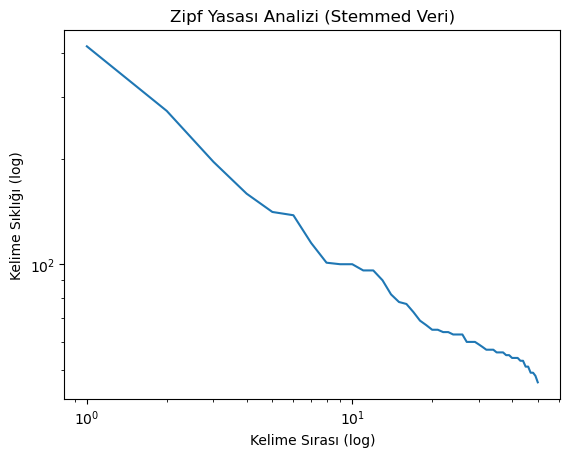

Toplam kelime sayısı: 20641
Farklı kelime sayısı: 4790


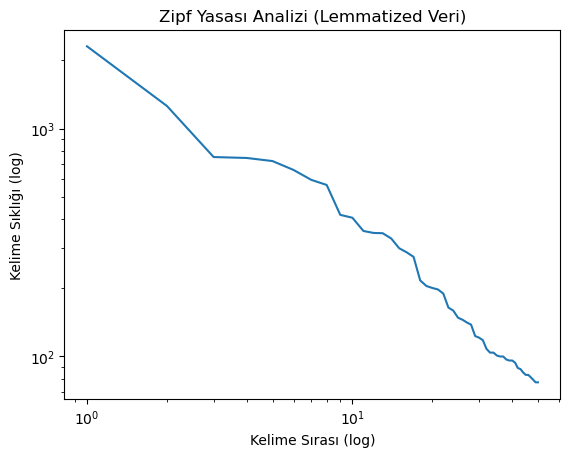

Toplam kelime sayısı: 35414
Farklı kelime sayısı: 5612


In [9]:
# Stemmed veri için analiz
zipf_analysis(df_stemmed['description_stemmed'], 'Zipf Yasası Analizi (Stemmed Veri)')

# Lemmatized veri için analiz
zipf_analysis(df_lemmatized['description_processed'], 'Zipf Yasası Analizi (Lemmatized Veri)')

In [10]:
# Ham verideki toplam metin sayısını hesapla
total_metin_ham = df_raw['description'].str.split().str.len().sum()

# Stemmed verideki toplam kelime sayısını hesapla
total_kelime_stemmed = df_stemmed['description_stemmed'].apply(len).sum()

# Lemmatized verideki toplam kelime sayısını hesapla
total_kelime_lemmatized = df_lemmatized['description_processed'].apply(len).sum()

# Sonuçları yazdır
print(f"Ham verideki toplam kelime sayısı: {total_metin_ham}")
print(f"Stemmed verideki toplam kelime sayısı: {total_kelime_stemmed}")
print(f"Lemmatized verideki toplam kelime sayısı: {total_kelime_lemmatized}")

Ham verideki toplam kelime sayısı: 36207
Stemmed verideki toplam kelime sayısı: 196932
Lemmatized verideki toplam kelime sayısı: 307902
